In [7]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

path ="./path/to/"
#path ="./image_sample/"
file = "a.jpg"

img = io.imread(path + file)    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
print(img.dtype)



float64


In [13]:
# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')




In [24]:
# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(img, edge_kernel,  'valid', fillvalue = 0)




In [4]:
# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')




In [5]:
# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)



/home/ravi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


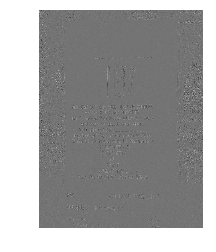

In [25]:
plt.imshow(edges, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()